## Interpolação linear


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

pi = np.pi
exp = np.exp

In [79]:
#Constants:
sigma = 1.0
mi= 0.0

#Range and points:
n = 100
x = np.linspace(-5.0, 5.0, num=n)


#Define the gaussian function:
def gauss (x):
    g =[]
        
    for j in range(0,n): 
                
        g_i =  (1 / ( sigma * pow((2*pi),0.5)))* exp( -0.5 * pow ((x[j] - mi) / sigma, 2.0))
        
        g.append(g_i)
    return g
z=gauss(x)

#Define the linear interpolation: 
def interpolate (z, x, l):
    p=[]  
    for i in range(0,n-1):
        dx = x[i+1] - x[i]
        dy = z[i+1] - z[i]
        coef_a = dy /dx
        coef_b = -dy/dx * x[i] + z[i]
        p.append((x[i],x[i+1], coef_a, coef_b))
    for item in p:
        if l >= item[0] and l<= item[1]:
            return item[2]*l + item[3], p

#Define the cumulative:
def cumulative (p, x, l):
    cumulative_list = []
    integral_i =0
    for item in p:
        if l>= item[0] and l>= item[1]:
            integral_i += item[2] /2 * (item[1]**2 - item[0]**2) + item[3] * (item[1] - item[0])
        elif l>= item[0] and l< item[0]:
            integral_i += item[2] /2 * (l**2 - item[0]**2) + item[3] * (l - item[0])
    return integral_i

#A list of pairs (ci, xi):
def cumulative_all_points(p, x):
    cumulative_all = []
    for i in x:
        c = cumulative(p, x, i)
        cumulative_all.append((c, i))
    return cumulative_all
result_interp, p = interpolate(z,x,2)
cumulative_all = cumulative_all_points (p, x)

#Define the sampler:
def sampler(cumulative_all, t):
    sampler_list=[] 
    for j in range(0, n-1):
        dc = cumulative_all[j+1][0] - cumulative_all[j][0]
        dx = cumulative_all[j+1][1] - cumulative_all[j][1]
        coefs_a = dx /dc
        coefs_b = -dx/dc * cumulative_all[j][0] + cumulative_all[j][1]
        sampler_list.append((cumulative_all[j][0], cumulative_all[j+1][0], coefs_a, coefs_b))
    for item in sampler_list:
        if t >= item[0] and t<= item[1]:
            return item[2]*t + item[3], t


#A list of sampler points
def sampler_points(cumulative_all, s_list):
    sampl_points = []
    for i in s_list:
        s = sampler(cumulative_all, i)
        sampl_points.append(s)
    return sampl_points

s_list = np.random.uniform(0,1,n)
samplerpoints = sampler_points(cumulative_all, s_list)

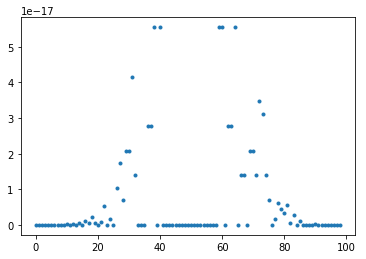

In [83]:
##################################################################################################################

#                                                 TESTS

##################################################################################################################

#print(cumulative_all)
# ponto = 5
# m, p = interpolate(z,x,ponto)
# teste = (1 / ( sigma * pow((2*pi),0.5)))* exp( -0.5 * pow ((ponto - mi) / sigma, 2.0))
# teste_c = cumulative(p,x, ponto)
# yn = sampler(cumulative_all, 0.5)


#for sampler:
x_i = []
c_i = []
for i in range(0,n-1):
    x_i.append(samplerpoints[i][0])
    c_i.append(samplerpoints[i][1])


#Absolute error for interpolation:

def abs_error(z,s_list):
    interp_i =[]
    err = []
    for i in range(0,n-1):
        interp_i.append(interpolate(z,x,s_list[i]))
        
        err.append(abs(interp_i[i][0] - z[i]))
    return err
    
plt.plot(abs_error(z,x), ".")

#for cumulative:
x_ii = []
c_ii = []
for i in range(0,n-1):
    x_ii.append(cumulative_all[i][1])
    c_ii.append(cumulative_all[i][0])

#Sampler error:

#print(x_i)
#print(c_i)
#plt.hist(x_i,100 )
#plt.hist(x_i, 100)
